In [1]:
import glob
import random

from IPython.display import display
from PIL import Image

from viroc.dataset import dataset_path
from viroc.imaging import extract_bounding_box, visualize_bounding_box
from viroc.models import GOTOCRModel, YOLOModel


In [2]:
# dataset_path = dataset_path.parent / "ccpd_weather"
dataset_path = dataset_path.parent / "ccpd_base"

In [3]:
imgs = glob.glob(str(dataset_path / "*.jpg"))

In [4]:
model = YOLOModel()
ocr_model = GOTOCRModel()

In [5]:
stitch_image = "/home/noah/projects2/viroc/test/stitch.jpg"

Found 3 bounding boxes
Bounding box 0: (119, 60, 206, 94)


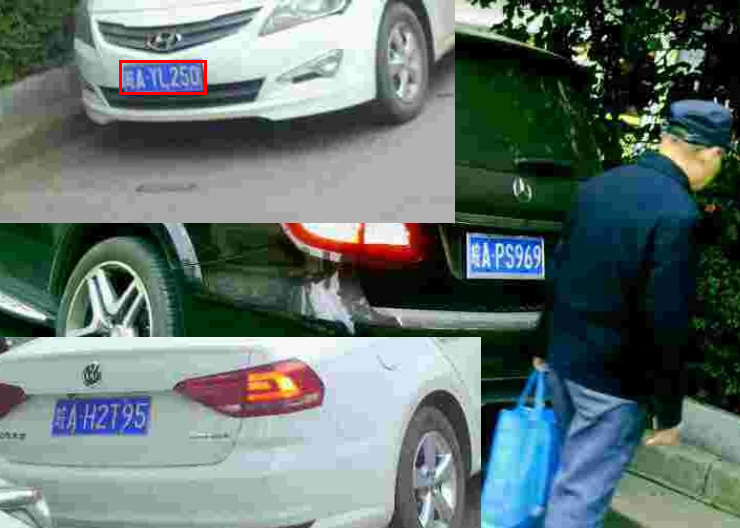

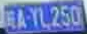

Generated text: RA-YL250
Bounding box 1: (462, 233, 546, 278)


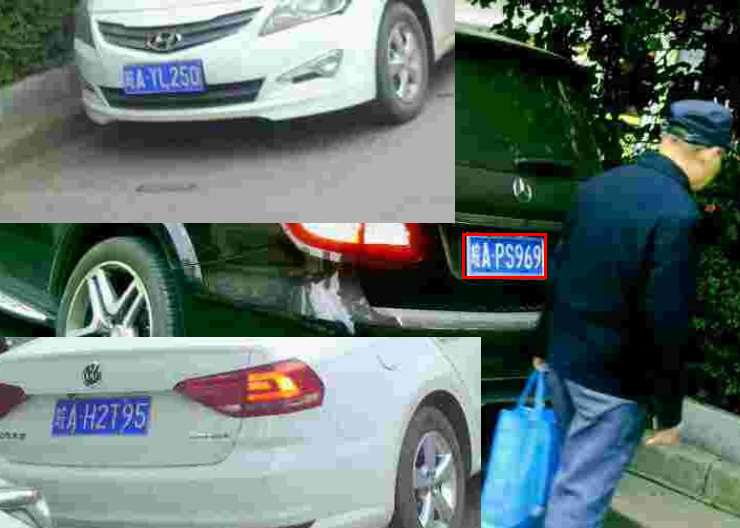

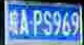

Generated text: 豫A·PS969
Bounding box 2: (51, 398, 148, 430)


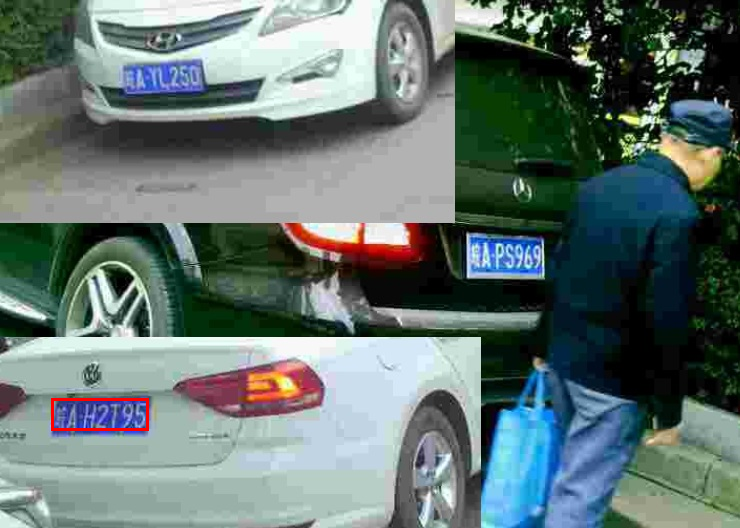

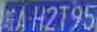

Generated text: 京A·H2T95


In [6]:
def ocr_demo(img: Image.Image):
    pil_image = Image.open(img)
    # display(pil_image)

    # get bounding boxes
    bbs = model.get_bounding_boxes(pil_image, threshold=0.05, overlap_tolerance=0.30)
    print(f"Found {len(bbs)} bounding boxes")
    for i, bb in enumerate(bbs):
        print(f"Bounding box {i}: {bb}")
        display(visualize_bounding_box(pil_image.copy(), bb))

        plate = extract_bounding_box(pil_image, bb)
        display(plate)

        # run OCR on plate
        generated_text = ocr_model.predict(plate)
        print(f"Generated text: {generated_text}")


ocr_demo(stitch_image)


Found 1 bounding boxes
Bounding box 0: (268, 447, 436, 515)


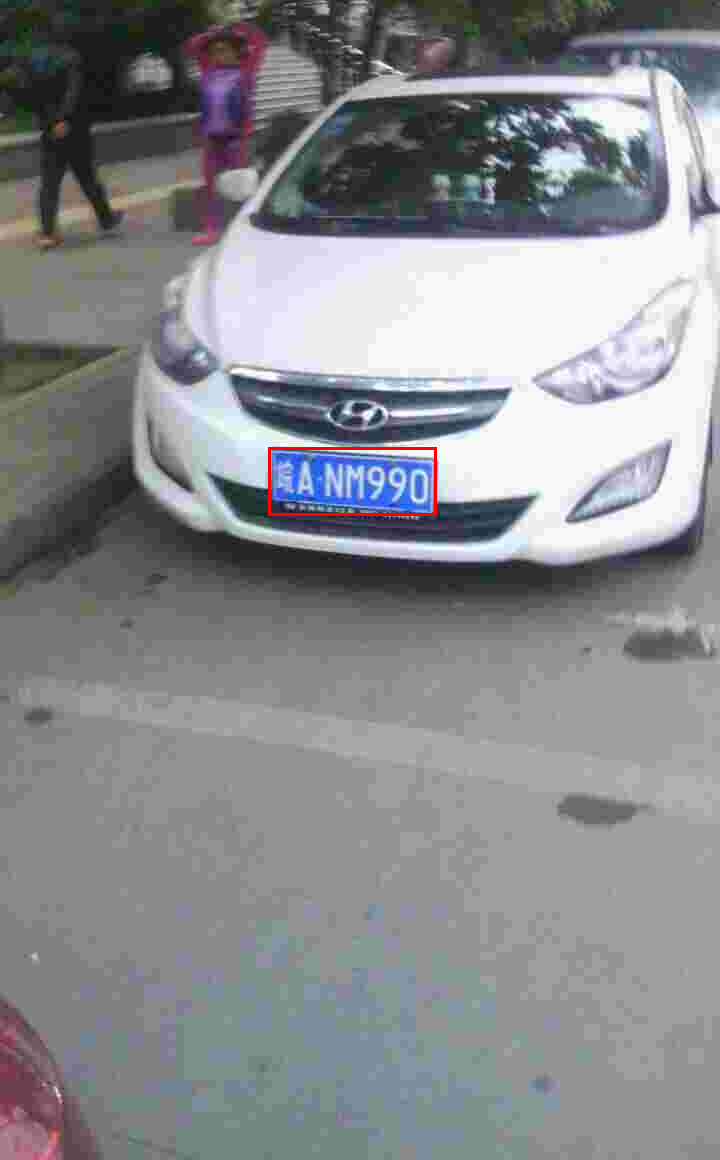

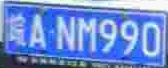

Generated text: 皖A·N990
Found 1 bounding boxes
Bounding box 0: (165, 536, 439, 637)


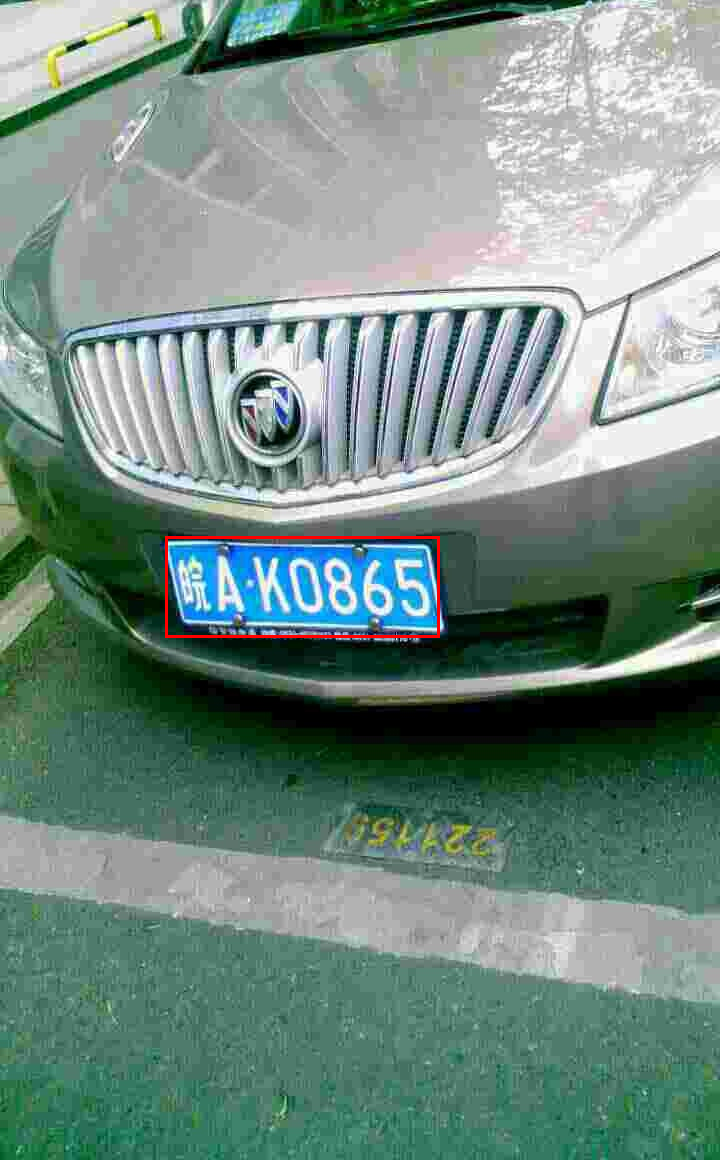

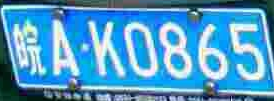

Generated text: 皖A·K0865
Found 1 bounding boxes
Bounding box 0: (215, 307, 479, 434)


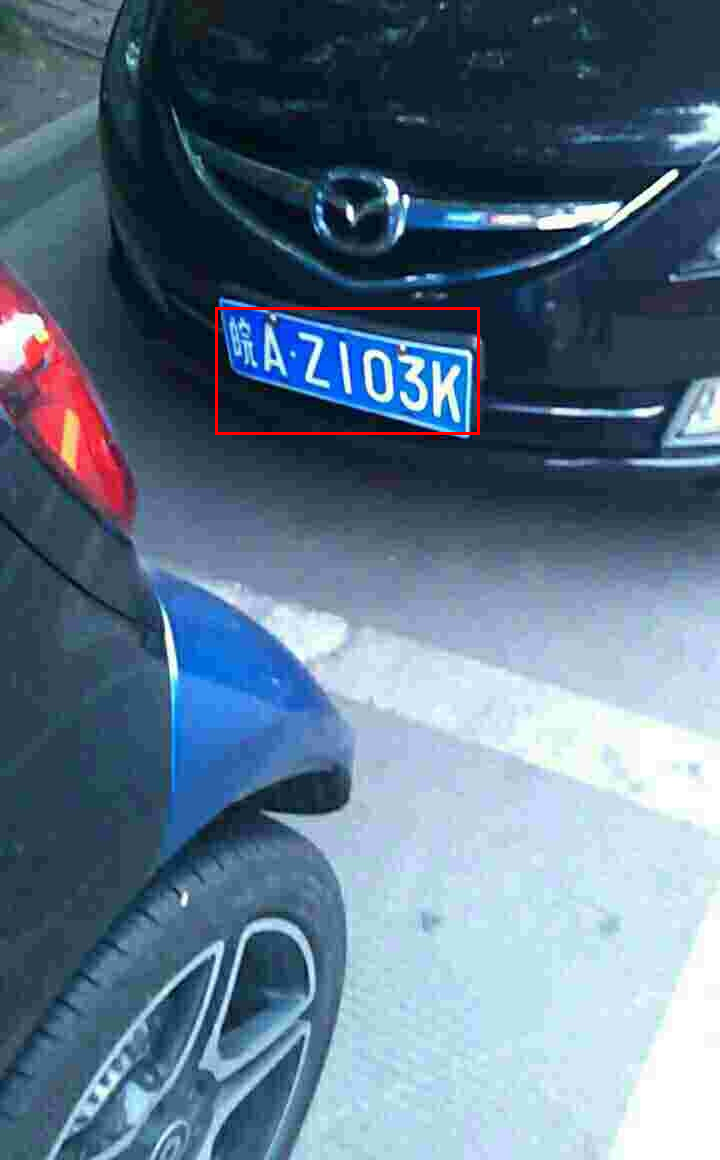

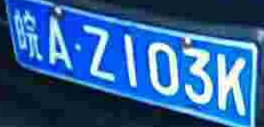

Generated text: 皖A·Z103K
Found 1 bounding boxes
Bounding box 0: (196, 442, 407, 554)


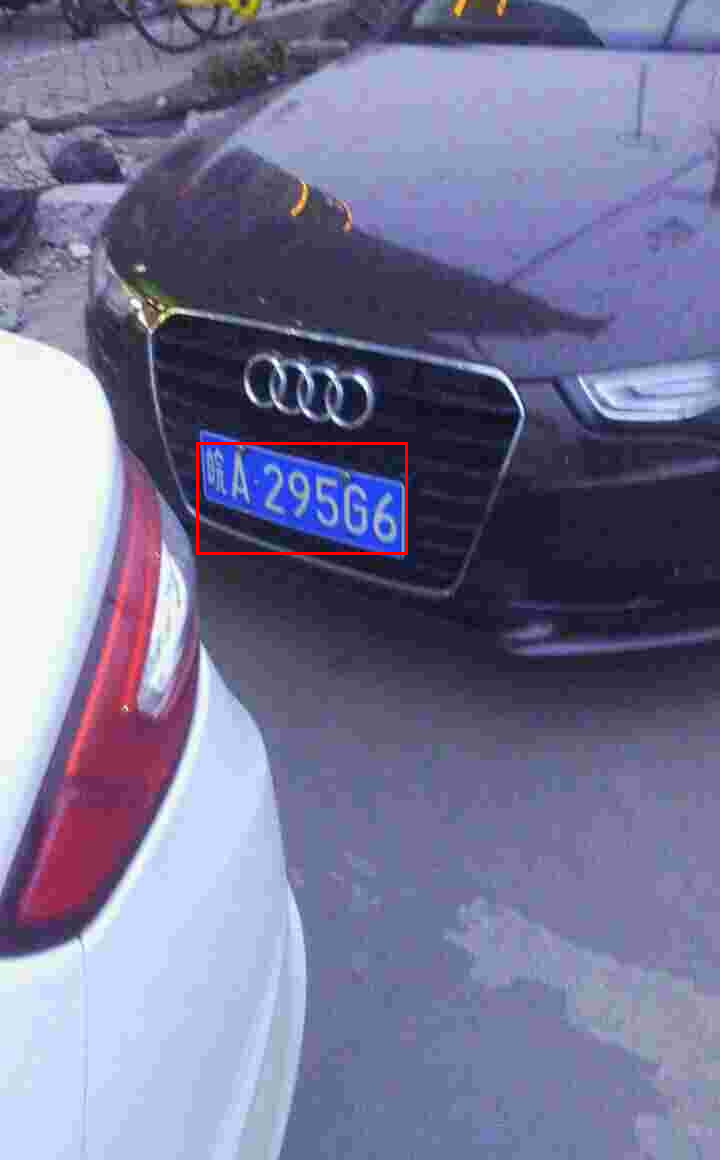

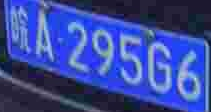

Generated text: 皖A·295G6
Found 1 bounding boxes
Bounding box 0: (181, 496, 531, 616)


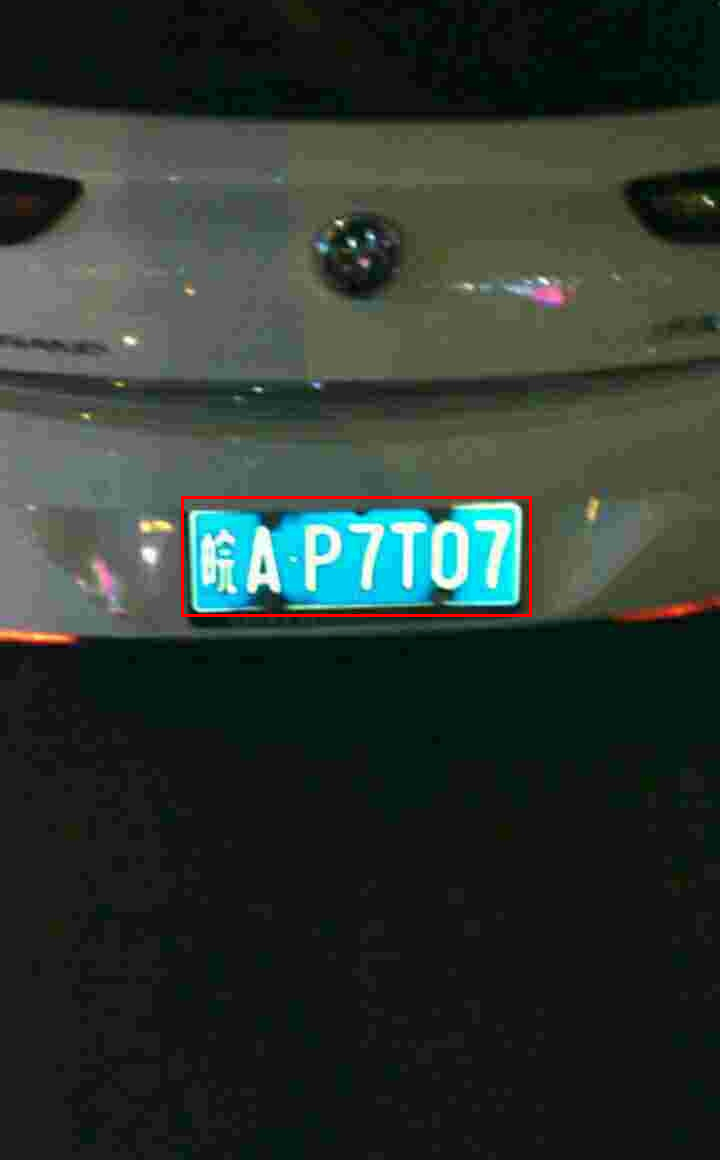

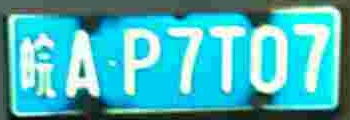

Generated text: 皖A·P7T07


In [7]:
random_indices = random.sample(range(len(imgs)), 5)

for i in random_indices:
    ocr_demo(imgs[i])